### Predicting Stock Prices using LSTM

In [86]:
# Requirements
# %pip install numpy pandas matplotlib 
# %pip install scikit-learn tensorflow
# %pip install --upgrade keras

In [87]:
# Loading the data
from data_collection import StockDataCollector
from data_cleaning import StockDataCleaner

# 1. Collect data
collector = StockDataCollector(historical_data_path='../Datasets/Historical Data') # specify the path of dataset dir
collector.collect_data()

# 2. Clean data
cleaner = StockDataCleaner()
cleaned_data = cleaner.clean_all(collector)

Looking for data in: c:\Users\LENOVO\Documents\GISMA\Data Mining\Stock-Predictions\Datasets\Historical Data
Successfully loaded 4 tickers


In [88]:
# Using Apple data
AAPL = cleaned_data["AAPL"]
print(f"Apple Stock: \n{AAPL}")

Apple Stock: 
           Date    Close     Volume      Open      High       Low
0    2025-06-13  196.450   51447350  199.7300  200.3700  195.7000
1    2025-06-12  199.200   43904640  199.0800  199.6800  197.3601
2    2025-06-11  198.780   60989860  203.5000  204.5000  198.4100
3    2025-06-10  202.670   54672610  200.6000  204.3500  200.5700
4    2025-06-09  201.450   72862560  204.3900  206.0000  200.0200
...         ...      ...        ...       ...       ...       ...
2511 2015-06-19   31.650  217446120   31.9275   31.9550   31.6000
2512 2015-06-18   31.970  141455960   31.8075   32.0775   31.8050
2513 2015-06-17   31.825  131435600   31.9300   31.9700   31.6850
2514 2015-06-16   31.900  125774600   31.7575   31.9625   31.5925
2515 2015-06-15   31.730  175587840   31.5250   31.8100   31.4275

[2516 rows x 6 columns]


In [89]:
# %pip install ta
from technical_indicators import TechnicalIndicators
import pandas as pd
import numpy as np

# 1. Calculate all technical indicators
aapl_with_indicators = TechnicalIndicators.calculate_all_indicators(AAPL)

# 2. Target variables
aapl_with_indicators['Target'] = aapl_with_indicators['Close'] - aapl_with_indicators['Open']
aapl_with_indicators['Target'] = aapl_with_indicators['Target'].shift(-1)

# 3. Target classe (1 if price goes up, 0 if down)
aapl_with_indicators['TargetClass'] = np.where(
    aapl_with_indicators['Target'] > 0, 1, 0
)

# 4. Next day's closing price as target
aapl_with_indicators['TargetNextClose'] = aapl_with_indicators['Close'].shift(-1)

# 5. Final dataset after cleaning
data = aapl_with_indicators.dropna().reset_index(drop=True)

# 6. Selecting Technical Indicators 
keep_columns = [
    'Open', 'High', 'Low', 'Close',  # Price data
    'SMA_50', 'SMA_200', 'EMA_12', 'EMA_26',  # From TechnicalIndicators
    'MACD', 'MACD_Hist',                  # MACD indicators
    'Stoch_%K', 'Stoch_%D',               # Stochastic
    'BB_Upper', 'BB_Lower', 'ATR',        # Volatility
    'Target', 'TargetClass', 'TargetNextClose'  # Targets
]

data = data[keep_columns]

# 7. Verify the data
print("Final dataset shape:", data.shape)
print("Columns:", data.columns.tolist())
print("\nSample data:")
print(data.head(5))

Final dataset shape: (2515, 18)
Columns: ['Open', 'High', 'Low', 'Close', 'SMA_50', 'SMA_200', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Hist', 'Stoch_%K', 'Stoch_%D', 'BB_Upper', 'BB_Lower', 'ATR', 'Target', 'TargetClass', 'TargetNextClose']

Sample data:
     Open    High       Low   Close      SMA_50     SMA_200      EMA_12  \
0  199.73  200.37  195.7000  196.45  196.450000  196.450000  196.450000   
1  199.08  199.68  197.3601  199.20  197.825000  197.825000  196.873077   
2  203.50  204.50  198.4100  198.78  198.143333  198.143333  197.166450   
3  200.60  204.35  200.5700  202.67  199.275000  199.275000  198.013150   
4  204.39  206.00  200.0200  201.45  199.710000  199.710000  198.541896   

       EMA_26      MACD  MACD_Hist   Stoch_%K   Stoch_%D    BB_Upper  \
0  196.450000  0.000000   0.000000  16.059957  16.059957  196.450000   
1  196.653704  0.219373   0.175499  74.946467  45.503212  200.575000   
2  196.811207  0.355243   0.249094  35.000000  42.002141  200.562498   
3  197.24519

In [90]:
# Making a decent dataset with dataframe

data_set = data.iloc[:, :]
data_set.head(50)

,Open,High,Low,Close,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Hist,Stoch_%K,Stoch_%D,BB_Upper,BB_Lower,ATR,Target,TargetClass,TargetNextClose
0,199.730,200.3700,195.7000,196.45,196.450000,196.450000,196.450000,196.450000,0.000000,0.000000,16.059957,16.059957,196.450000,196.450000,0.000000,0.120,1,199.20
1,199.080,199.6800,197.3601,199.20,197.825000,197.825000,196.873077,196.653704,0.219373,0.175499,74.946467,45.503212,200.575000,195.075000,0.000000,-4.720,0,198.78
2,203.500,204.5000,198.4100,198.78,198.143333,198.143333,197.166450,196.811207,0.355243,0.249094,35.000000,42.002141,200.562498,195.724169,0.000000,2.070,1,202.67
3,200.600,204.3500,200.5700,202.67,199.275000,199.275000,198.013150,197.245192,0.767958,0.529448,79.204545,63.050337,203.719918,194.830082,0.000000,-2.940,0,201.45
4,204.390,206.0000,200.0200,201.45,199.710000,199.710000,198.541896,197.556659,0.985237,0.597381,55.825243,56.676596,204.049751,195.370249,0.000000,0.920,1,203.92
5,203.000,205.7000,202.0500,203.92,200.411667,200.411667,199.369297,198.028018,1.341279,0.762739,79.805825,71.611871,205.465502,195.357831,0.000000,-2.870,0,200.63
6,203.500,204.7500,200.1500,200.63,200.442857,200.442857,199.563251,198.220757,1.342494,0.611163,47.864078,61.165049,205.124294,195.761420,0.000000,-0.090,0,202.82
7,202.910,206.2400,202.1000,202.82,200.740000,200.740000,200.064289,198.561442,1.502848,0.617213,67.552182,65.074028,205.392806,196.087194,0.000000,1.920,1,203.27
8,201.350,203.7700,200.9550,203.27,201.021111,201.021111,200.557476,198.910224,1.647252,0.609294,71.821632,62.412631,205.687153,196.355069,0.000000,1.420,1,201.70
9,200.280,202.1300,200.1200,201.70,201.089000,201.089000,200.733249,199.116874,1.616375,0.462733,56.925996,65.433270,205.534298,196.643702,0.000000,1.480,1,200.85


In [91]:
# Dataset Information 
print(f'New Dataset Shape: {data_set.shape} -> New Dataset Type: {type(data_set)}')
print(f'Previous Dataset Shape: {data.shape} -> Previous Dataset Type: {type(data)}')

New Dataset Shape: (2515, 18) -> New Dataset Type: <class 'pandas.core.frame.DataFrame'>
Previous Dataset Shape: (2515, 18) -> Previous Dataset Type: <class 'pandas.core.frame.DataFrame'>


In [92]:
# Target column Categories
# y =[1 if data.Open[i]>data.Close[i] else 0 for i in range(0, len(data))]
# yi = [data.Open[i]-data.Close[i] for i in range(0, len(data))]
# print(yi)
# print(len(yi))

In [93]:
# Applying scaler to our new data because we are using Neural Networks; so the data should be between 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
data_set_scaled = sc.fit_transform(data_set)
print(data_set_scaled)

[[0.75196232 0.7481686  0.73676213 ... 0.34968431 1.         0.74699177]
 [0.74920446 0.74525945 0.7438185  ... 0.23215153 0.         0.74521539]
 [0.76795791 0.76558136 0.74828118 ... 0.3970374  1.         0.76166811]
 ...
 [0.03949043 0.03862005 0.04011477 ... 0.3442205  0.         0.03908051]
 [0.04001018 0.03816681 0.0396047  ... 0.35023069 1.         0.03939772]
 [0.03927829 0.03813519 0.03921152 ... 0.35174842 1.         0.03867871]]


In [94]:
# Input data (X)
data_set = data.iloc[:, :15]
data_set.head(5)

,Open,High,Low,Close,SMA_50,SMA_200,EMA_12,EMA_26,MACD,MACD_Hist,Stoch_%K,Stoch_%D,BB_Upper,BB_Lower,ATR
0,199.73,200.37,195.7000,196.45,196.450000,196.450000,196.450000,196.450000,0.000000,0.000000,16.059957,16.059957,196.450000,196.450000,0.0
1,199.08,199.68,197.3601,199.20,197.825000,197.825000,196.873077,196.653704,0.219373,0.175499,74.946467,45.503212,200.575000,195.075000,0.0
2,203.50,204.50,198.4100,198.78,198.143333,198.143333,197.166450,196.811207,0.355243,0.249094,35.000000,42.002141,200.562498,195.724169,0.0
3,200.60,204.35,200.5700,202.67,199.275000,199.275000,198.013150,197.245192,0.767958,0.529448,79.204545,63.050337,203.719918,194.830082,0.0
4,204.39,206.00,200.0200,201.45,199.710000,199.710000,198.541896,197.556659,0.985237,0.597381,55.825243,56.676596,204.049751,195.370249,0.0


In [95]:
# Output (y)
data_set = data.iloc[:, -1]
data_set.head(5)

0    199.20
1    198.78
2    202.67
3    201.45
4    203.92
Name: TargetNextClose, dtype: float64

In [ ]:
# Feeding input and output data
# Multiple feature from data provided to the model

X = []
# backcandles: number of days in past to predict the closing price of tomorrow's candle
backcandles = 5 
print(data_set_scaled.shape[0])
for j in range(15):
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(data_set_scaled[i-backcandles:i, j])

# Moving axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

X, yi =np.array(X), np.array(data_set_scaled[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

# print(X) # 3 dim array 
print(X.shape)
# print(y) # 2 dim array
print(y.shape)

2515
(2510, 5, 15)
(2510, 1)


In [97]:
# Split data into train and test sets [80%(train) & 20%(test)]
splitlimit = int(len(X)*0.8)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2008
(2008, 5, 15)
(502, 5, 15)
(2008, 1)
(502, 1)
[[0.75303995]
 [0.76230254]
 [0.76420581]
 ...
 [0.05796519]
 [0.05947723]
 [0.05824011]]


In [98]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np

lstm_input = Input(shape=(backcandles, 15), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=30, shuffle=True, validation_split = 0.1)

Epoch 1/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.0189 - val_loss: 1.7780e-04
Epoch 2/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5452e-04 - val_loss: 4.8688e-05
Epoch 3/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3869e-04 - val_loss: 5.2049e-05
Epoch 4/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1771e-04 - val_loss: 4.2251e-05
Epoch 5/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 2.7660e-04 - val_loss: 1.3468e-04
Epoch 6/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 3.0661e-04 - val_loss: 8.5446e-05
Epoch 7/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.5396e-04 - val_loss: 3.1252e-05
Epoch 8/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4165e-04 - val_loss: 1.8458e-05
Epoch 9/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9820e-04 - val_loss: 3.3930e-05
Epoch 10/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.4067e-04 - val_loss: 1.7426e-05
Epoch 11/30
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss:

In [99]:
y_pred = model.predict(X_test)
for i in range(10):
    print(y_pred[i], y_test[i])

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
[0.05549572] [0.06200436]
[0.05396336] [0.06835917]
[0.05755866] [0.06876097]
[0.06143658] [0.06778819]
[0.06303957] [0.06723835]
[0.06300362] [0.06884556]
[0.06292077] [0.06644532]
[0.06382766] [0.06600123]
[0.06352396] [0.06696344]
[0.06328369] [0.06689999]


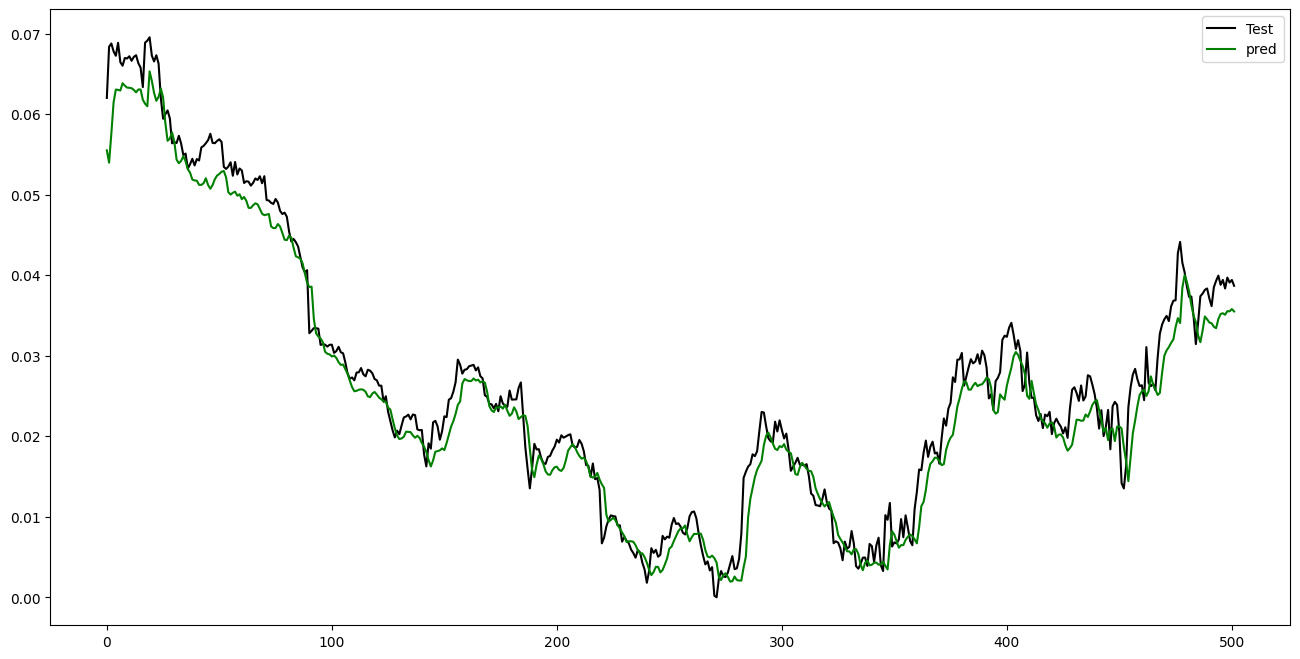

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()

In [103]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
accuracy = (1 - rmse / np.mean(y_test)) * 100
print(f"Model accuracy: {accuracy:.2f}%")

Model accuracy: 87.80%
